In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Dataset\\Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Applying k-fold cross validation Method

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = X_train,y = y_train,cv=10) 
#estimator is the model we are having i.e. the object we have created.

In [11]:
accuracies.tolist()

[0.8064516129032258,
 0.9666666666666667,
 0.8,
 0.9333333333333333,
 0.8666666666666667,
 0.8333333333333334,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9655172413793104]

In [12]:
accuracies_mean = accuracies.mean()
print('The mean accuracy is ',accuracies_mean);
accuracies_variance = accuracies.std()
print('The variance is ',accuracies_variance)

The mean accuracy is  0.9005302187615868
The variance is  0.06388957356626285


Standard Deviation is 6% i.e. The average of the difference between the different accuracies we will get on evaluating our model performance and the average accuracy that is 90% is 6%.<br>
SO we are low bias low variance category.<br><br>
But still model can be improved by finding the optimal values of hyper parameters. It can be done through grid search.

**Improving the Model**

# Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},#Checking for linear kernel
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001]}#Checking for non-linear kernel
]
grid_search = GridSearchCV(estimator = classifier,param_grid=parameters,scoring='accuracy',cv=10)
#n_jobs : If we are working on large data sets, it will project power of cpu for computation
grid_search = grid_search.fit(X_train,y_train)

In [14]:
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
print("Best accuracy : ",best_accuracy)
print("Best Parameters : ",best_parameter)

Best accuracy :  0.9
Best Parameters :  {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


# Re-evaluating with new parameters or change in value

In [15]:
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},#Checking for linear kernel
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}#Checking for non-linear kernel
]
grid_search = GridSearchCV(estimator = classifier,param_grid=parameters,scoring='accuracy',cv=10)
#n_jobs : If we are working on large data sets, it will project power of cpu for computation
grid_search = grid_search.fit(X_train,y_train)

In [16]:
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
print("Best accuracy : ",best_accuracy)
print("Best Parameters : ",best_parameter)

Best accuracy :  0.9033333333333333
Best Parameters :  {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [17]:
parameters[0].values()

dict_values([[1, 10, 100, 1000], ['linear']])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


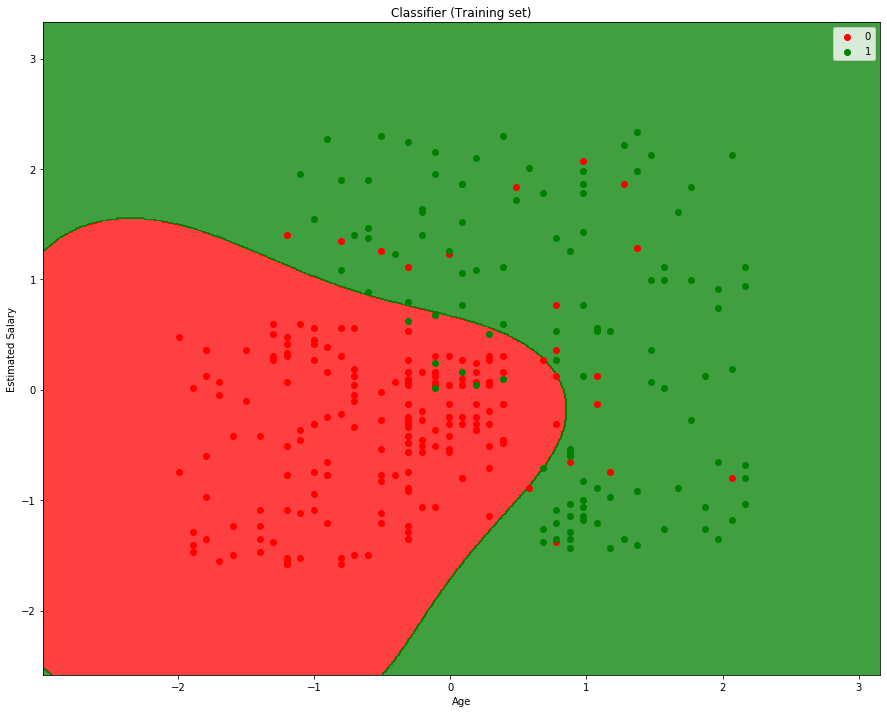

In [18]:
# Visualising the Training set results
plt.figure(figsize=(15, 12))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red',  'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


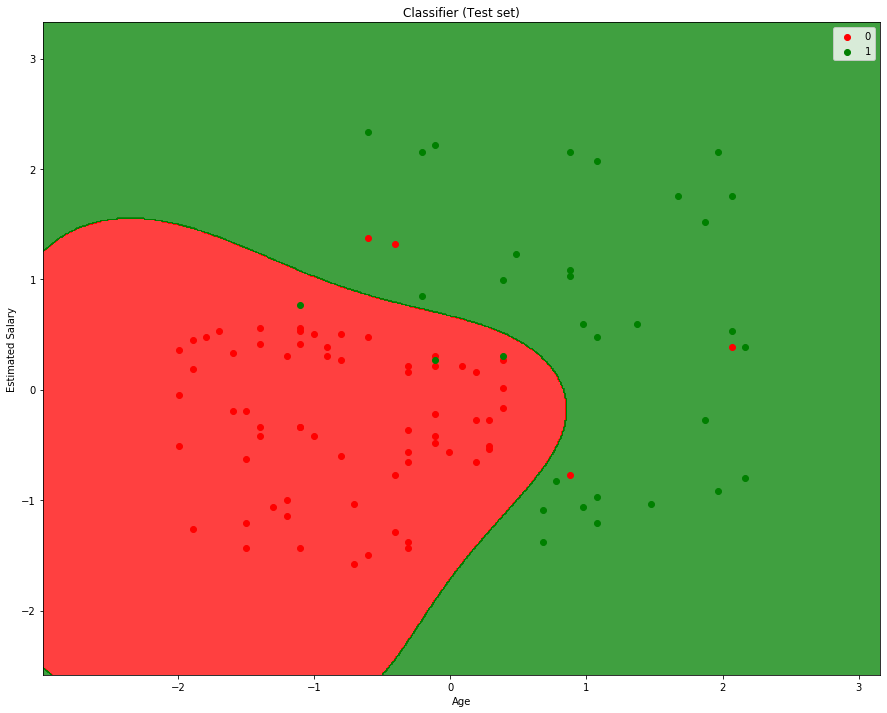

In [19]:
# Visualising the Test set results
plt.figure(figsize=(15, 12))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [20]:
#Best Parameters :  {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}
classifier = SVC(kernel = 'rbf',random_state = 0,C=1,gamma=0.7)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix = \n',cm)

Confusion Matrix = 
 [[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


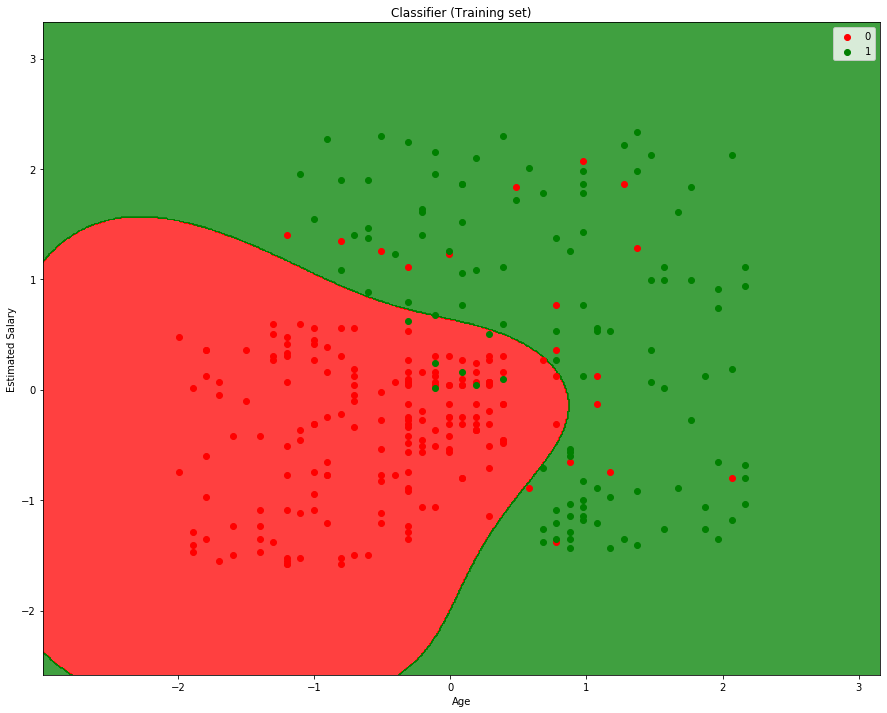

In [21]:
# Visualising the Training set results
plt.figure(figsize=(15, 12))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red',  'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()